## Zyfra

## 1. Contenido <a name="content"></a>

* [1 Contenido](#content)
* [2 Introducción](#intro)
* [3 Inicialización](#inic)
    * [3.1 Cargar Librerias](#library)
    * [3.2 Cargar Datos](#data)
* [4 Exploración y preparación los datos](#exp) 
    * [4.1 Cálculo de recuperación](#rec)
    * [4.2 Conjunto de Prueba](#test)
    * [4.3 Preprocesamiento de datos](#prep)
         * [4.3.1 Gold_recovery_test](#gold_test)
         * [4.3.2 Gold_recovery_train](#gold_train)
         * [4.3.3 Gold_recovery_full](#gold_full)
* [5 Análisis de Datos](#analysis)
    * [5.1 Concentración de metales](#metal)
    * [5.2 Distribución de tamaño de partículas](#size)
    * [5.3 Concentraciones totales](#concentration)
* [6 Modelo](#model)
    * [6.1 sMAPE](#smape)
    * [6.2 Construcción del modelo](#building)
         * [6.2.1 Segmentacióon de los datos](#seg)
         * [6.2.2 Árbol de desición](#tree)
         * [6.2.3 Bosque aleatorio](#forest)
         * [6.2.4 Regresión lineal](#regre)          
    * [6.3 Elección del modelo](#choose)
* [7 Conclusiones](#end)

## 2. Introducción <a name="intro"></a>

En el presente proyecto procederemos a desarrollar un prototipo de modelo de machine learning para la empresa Zyfra con el objetivo de predecir la cantidad de oro extraído del mineral de oro a partir de datos de extracción y purificación del mismo. El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

Comenzaremos revisando los datos proporcionados, realizaremos un análisis de los datos y desarrollaremos el modelo solicitado.

## 3. Inicialización <a name="inic"></a>

### 3.1 Cargar librerias <a name="library"></a>

Se procede a cargar las librerías que se utilizaran en el proyecto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import matplotlib.image as mpimg

### 3.2 Cargar datos <a name="data"></a>

Se procede a cargar los datos.

In [2]:
df_train = pd.read_csv('datasets/gold_recovery_train.csv')
df_test = pd.read_csv('datasets/gold_recovery_test.csv')
df = pd.read_csv('datasets/gold_recovery_full.csv')

## 4. Exploración y preparación los datos <a name="exp"></a>

A continuación, procederemos a realizar una exploración sobre las bases de datos entregadas por Zyfra.

In [3]:
for data in (df, df_train, df_test):
    print(data.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [4]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Observando la base de datos gold_recovery_full podemos apreciar que a excepción de la columna date, todas las columnas están compuestas por datos numéricos de tipo float64, también podemos apreciar la existencia de valores ausentes en prácticamente todas las columnas siendo el mayor caso la columna "rougher.output.recovery" con 3119 valores ausentes, alrededor de un 13,7% de sus datos. Podemos apreciar al observar las primeras 5 filas de la base de datos completa que como es el tipo de valores en las distintas columnas.

Finalmente podemos apreciar que la base de datos de prueba contiene una selección filtrada de las columnas, lo que será abordado más adelante.

### 4.1 Cálculo de recuperación <a name="rec"></a>

Comenzaremos comprobando que el cálculo de la recuperación sea correcto con la base de datos de entrenamiento, a continuación, se mostrará una imagen que muestra la fórmula para el cálculo de recuperación y que significa cada variable.

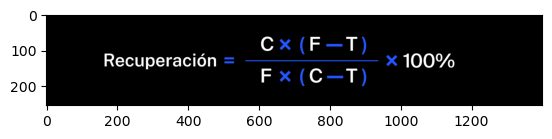

In [5]:
img = mpimg.imread('images/recuperacion_formula.png')
imgplot = plt.imshow(img)
plt.show()

* C — proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final)

* F — la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final)

* T — la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final)

Para realizar la comprobación del cálculo eliminaremos las filas con valores ausentes para que no arrojen errores en el mismo.

In [6]:
df_train_not_null = df_train.dropna()
C = df_train_not_null['rougher.output.concentrate_au']
F = df_train_not_null['rougher.input.feed_au']
T = df_train_not_null['rougher.output.tail_au']
recov = (C*(F-T))/(F*(C-T))*100

In [7]:
print(mean_absolute_error(df_train_not_null['rougher.output.recovery'], recov))

9.460144184559453e-15


Como podemos apreciar, el resultado obtenido del error absoluto medio entre nuestros cálculos y los valores existentes arroja un error mínimo por lo que podemos asegurar que el calculo de recuperación es correcto.

### 4.2 Conjunto de Prueba <a name="test"></a>

Procederemos a observar las características que no se encuentran disponibles en el conjunto de pruebas.

In [8]:
df_test_not = df.drop(df_test.columns, axis=1)
df_test_not.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                                22635 non-null  float64


Al observar las columnas que no se encuentran en la base de datos de prueba podemos notar que todas pertenecen a las concentraciones de los distintos tipos de metales que posee la materia prima a través de los procesos por lo que esta pasa para obtener el concentrado de oro, ya sea las colas que se van descartando como los concentrados que pasan proceso a proceso. También apreciamos que las concentraciones finales de oro tampoco se encuentran en esta base de datos, por lo que podemos inferir que las columnas que se mantienen en la base de datos son las que definen el proceso y por ende los parámetros responsables de la cantidad de oro que se obtendrá finalmente.

### 4.3 Preprocesamiento de datos <a name="prep"></a>

Como observamos al comienzo de la sección, las bases de datos poseen valores ausentes los cuales deben ser tratados para el correcto entrenamiento de los modelos de machine learning. En este caso solo abordaremos las bases de datos de entrenamiento y prueba ya que con ellas trabajaremos directamente con los modelos de machine learning, pero antes de tratarlas veremos si existen valores duplicados en la base de datos completa a través de la columna 'date', ya que esta contiene los distintos registros que se han realizado y por ende sus valores deberían de ser únicos.

In [9]:
df['date'].duplicated().sum()

0

Podemos apreciar que no existen filas duplicadas en la base de datos completa, por lo que continuaremos con el tratamiento de los valores ausentes.

#### 4.3.1 Gold_recovery_test <a name="gold_test"></a>

In [10]:
((df_test.isna().sum()/len(df_test))*100).sort_values(ascending=False).head(10)

rougher.input.floatbank11_xanthate          6.028005
primary_cleaner.input.sulfate               5.157104
primary_cleaner.input.depressant            4.849727
rougher.input.floatbank10_sulfate           4.388661
primary_cleaner.input.xanthate              2.834699
rougher.input.floatbank10_xanthate          2.100410
rougher.input.feed_sol                      1.144126
rougher.input.floatbank11_sulfate           0.939208
rougher.input.feed_rate                     0.683060
secondary_cleaner.state.floatbank3_a_air    0.580601
dtype: float64

Podemos apreciar que la columna que posee una mayor cantidad de datos ausentes son alrededor de un 6% de los datos, debido a la poca cantidad de datos ausentes, que no poseemos una clara relación entre las columnas que no corresponda al cálculo de la extracción de oro y para no intervenir en los propios cálculos de obtención de oro que se realizaran durante el proceso es que se optara por eliminar las filas con valores ausentes para que el modelo tenga la mayor fiabilidad posible.

In [11]:
df_test = df_test.dropna()

#### 4.3.2 gold_recovery_train <a name="gold_train"></a>

In [12]:
((df_train.isna().sum()/len(df_train))*100).sort_values(ascending=False).head(10)

rougher.output.recovery               15.260973
rougher.output.tail_ag                13.345196
rougher.output.tail_sol               13.339265
rougher.output.tail_au                13.339265
secondary_cleaner.output.tail_sol     11.779359
rougher.input.floatbank11_xanthate    11.293001
final.output.recovery                  9.021352
primary_cleaner.input.sulfate          7.752076
primary_cleaner.input.depressant       7.485172
rougher.calculation.au_pb_ratio        7.366548
dtype: float64

Con respecto a la base de datos de entrenamiento, aquí encontramos columnas con un mayor porcentaje de valores ausentes que en el anterior caso. Siguiendo los parámetros definidos en el caso anterior, procederemos a rellenar las columnas de "final.output.recovery" y "rougher.output.recovery" con la fórmula que definimos anteriormente para las filas que posean los valores necesarios, posteriormente eliminaremos las filas que posean valores ausentes en las mismas columnas que en el caso de la base de datos de pruebas ya que estas son las que utilizaremos para el entrenamiento del modelo.

In [13]:
def recovery_rougher(data):
    CR = data['rougher.output.concentrate_au']
    FR = data['rougher.input.feed_au']
    TR = data['rougher.output.tail_au']
    recov = (CR*(FR-TR))/(FR*(CR-TR))*100
    return recov

In [14]:
train_null = df_train[df_train['rougher.output.recovery'].isna()]
df_train['rougher.output.recovery'] = df_train['rougher.output.recovery'].fillna(recovery_rougher(train_null))

In [15]:
def recovery_final(data):
    CR = data['final.output.concentrate_au']
    FR = data['rougher.output.concentrate_au']
    TR = data['final.output.tail_au']
    recov = (CR*(FR-TR))/(FR*(CR-TR))*100
    return recov

In [16]:
train_null = df_train[df_train['final.output.recovery'].isna()]
df_train['final.output.recovery'] = df_train['final.output.recovery'].fillna(recovery_final(train_null))

In [17]:
record = df_test.columns.tolist()
df_train = df_train.dropna(subset=record)
df_train = df_train.dropna(subset=['rougher.output.recovery','final.output.recovery'])

#### 4.3.3 Gold_recovery full <a name="gold_full"></a>

Procederemos a aplicar el mismo tratamiento que en la sección anterior a las columnas "rougher.output.recovery" y "final.output.recovery" para el dataframe full.

In [18]:
train_null = df[df['rougher.output.recovery'].isna()]
df['rougher.output.recovery'] = df['rougher.output.recovery'].fillna(recovery_rougher(train_null))

In [19]:
train_null = df[df['final.output.recovery'].isna()]
df['final.output.recovery'] = df['final.output.recovery'].fillna(recovery_final(train_null))

In [20]:
df = df.dropna()

## 5. Análisis de Datos <a name="analysis"></a>

Comenzaremos el análisis de los datos observando cómo cambia la concentración de los metales de oro, plata y plomo en función de la etapa de purificación, posteriormente compararemos las distribuciones de tamaños de las partículas de la alimentación en las bases de datos de entrenamiento y prueba para corroborar que el modelo funcione de forma correcta, finalmente observaremos las concentraciones totales de todas las sustancias en las distintas fases del proyecto para encontrar si existen valores anómalos en los datos.

### 5.1 Concentración de metales <a name="metal"></a>

In [21]:
df_au = df[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
df_ag = df[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
df_pb = df[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

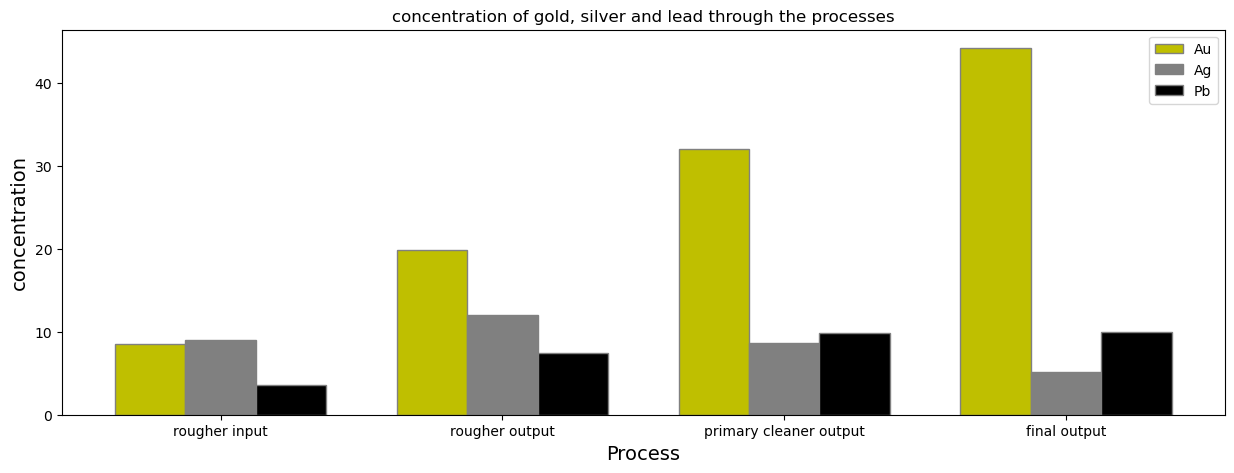

In [22]:
barWidth = 0.25
fig = plt.subplots(figsize =(15, 5))

br1 = np.arange(len(df_au.mean()))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, df_au.mean(), color ='y', width = barWidth, edgecolor ='grey', label ='Au')
plt.bar(br2, df_ag.mean(), color ='grey', width = barWidth, edgecolor ='grey', label ='Ag')
plt.bar(br3, df_pb.mean(), color ='black', width = barWidth, edgecolor ='grey', label ='Pb')

plt.xlabel('Process', fontsize = 14)
plt.ylabel('concentration', fontsize = 14)
plt.xticks([r + barWidth for r in range(len(df_au.mean()))],
        ['rougher input', 'rougher output', 'primary cleaner output', 'final output']) 
plt.title('concentration of gold, silver and lead through the processes')
plt.legend()
plt.show()

Al observar el grafico, podemos apreciar que como es esperado la concentración de oro aumenta según van avanzando los procesos debido a que se van eliminando otros minerales del conjunto que pasa por los procesos, por parte de la plata vemos que aumenta su concentración al pasar por el proceso de flotación, pero luego disminuye en los procesos de limpieza con lo que concluimos que durante la flotación no se remueve plata del conjunto, pero esta si es extraída en el proceso de limpieza. Finalmente podemos ver que la concentración de plomo aumenta moderadamente según transcurren los procesos por lo que es un mineral que no es extraído mayoritariamente en los procesos de flotación o limpieza.

### 5.2 Distribución de tamaño de partículas <a name="size"></a>

Continuaremos observando el tamaño de las partículas de la alimentación en el proceso de limpieza primaria y flotación entre las bases de datos de entrenamiento y prueba.

In [23]:
def histogram(data1, data2, columna, ylabel, title, label1, label2):
    plt.figure(figsize=(15,5))
    plt.hist(data1[columna], bins=100, alpha=0.5, label=label1)
    plt.hist(data2[columna], bins=100, alpha=0.5, label=label2)
    plt.xlabel(columna, size=14)
    plt.ylabel(ylabel, size=14)
    plt.title(title)
    plt.legend(loc='upper right')

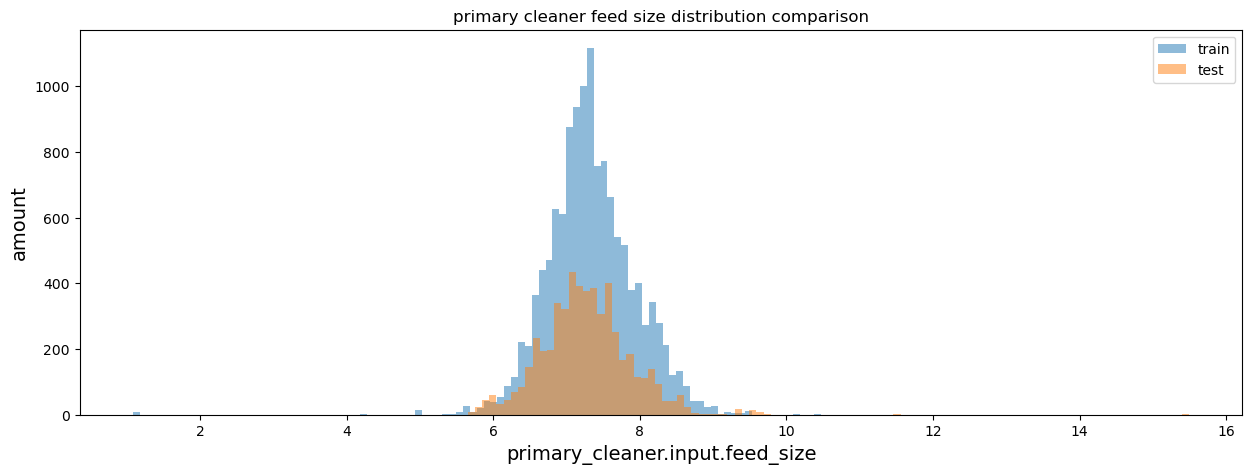

In [24]:
histogram(df_train, df_test, 'primary_cleaner.input.feed_size', 'amount', 'primary cleaner feed size distribution comparison', 'train', 'test')

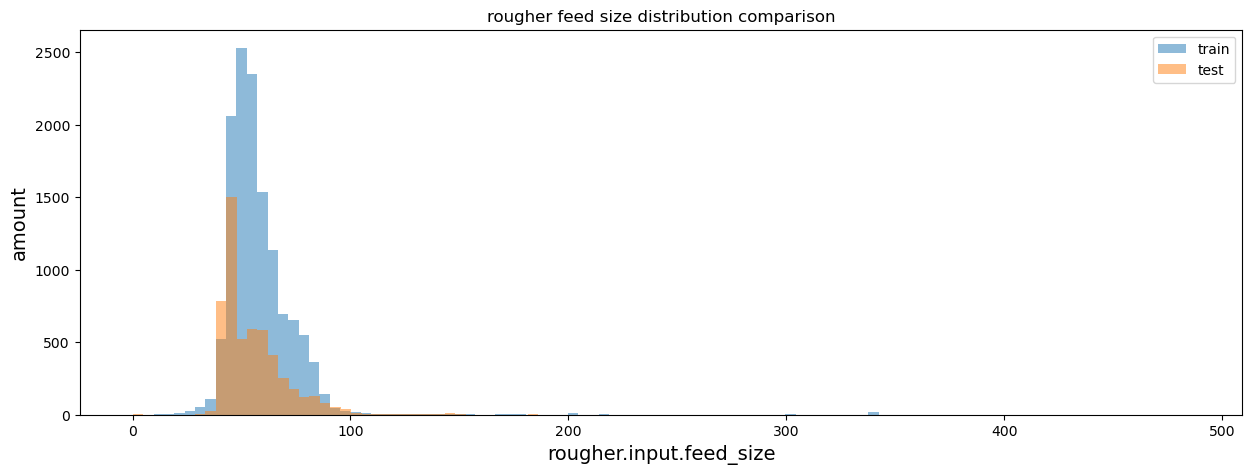

In [25]:
histogram(df_train, df_test, 'rougher.input.feed_size', 'amount', 'rougher feed size distribution comparison', 'train', 'test')

Al observar los dos gráficos podemos apreciar que, en general, la distribución de los tamaños de partículas de alimentación en ambos procesos es similar en ambas bases de datos, por lo que este factor no debería interferir en el entrenamiento de nuestro modelo.

### 5.3 Concentraciones totales <a name="concentration"></a>

Como último punto, observaremos la concentración total de todos los minerales en las distintas etapas, materia prima, concentrado rougher y concentrado final, para observar si existen valores anómalos.

In [26]:
df_prime = df[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']].sum(axis=1)
df_rougher = df[['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']].sum(axis=1)
df_final = df[['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au']].sum(axis=1)

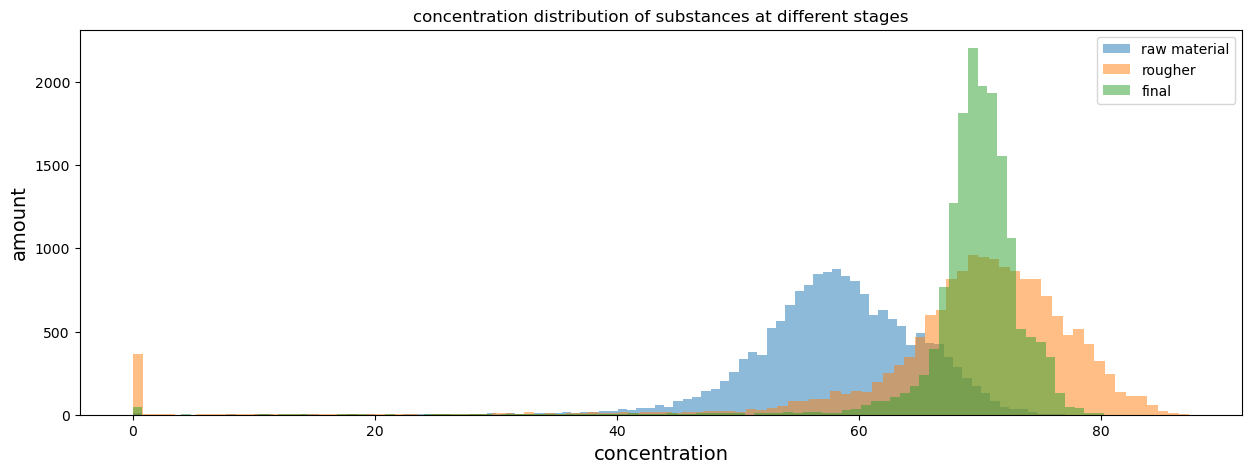

In [27]:
plt.figure(figsize=(15,5))
plt.hist(df_prime, bins=100, alpha=0.5, label='raw material')
plt.hist(df_rougher, bins=100, alpha=0.5, label='rougher')
plt.hist(df_final, bins=100, alpha=0.5, label='final')
plt.xlabel('concentration', size=14)
plt.ylabel('amount', size=14)
plt.title('concentration distribution of substances at different stages')
plt.legend(loc='upper right')

Al observar el grafico de concentraciones podemos apreciar una gran cantidad de valores anómalos en las tres etapas con concentraciones de minerales cercanas a 0, procederemos a eliminar estos valores ya que se encuentran fuera de las distribuciones de las concentraciones de minerales y podrían afectar negativamente a nuestro modelo.

In [28]:
df_train = df_train.drop(df_train[(df_train['rougher.input.feed_ag']+df_train['rougher.input.feed_pb']+df_train['rougher.input.feed_sol']+df_train['rougher.input.feed_au']) <= 1].index)
df_train = df_train.drop(df_train[(df_train['rougher.output.concentrate_ag']+df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_sol']+df_train['rougher.output.concentrate_au']) <= 1].index)
df_train = df_train.drop(df_train[(df_train['final.output.concentrate_ag']+df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_sol']+df_train['final.output.concentrate_au']) <= 1].index)
df_test = df_test.drop(df_test[(df_test['rougher.input.feed_ag']+df_test['rougher.input.feed_pb']+df_test['rougher.input.feed_sol']+df_test['rougher.input.feed_au']) <= 1].index)
df = df.drop(df[(df['rougher.input.feed_ag']+df['rougher.input.feed_pb']+df['rougher.input.feed_sol']+df['rougher.input.feed_au']) <= 1].index)
df = df.drop(df[(df['rougher.output.concentrate_ag']+df['rougher.output.concentrate_pb']+df['rougher.output.concentrate_sol']+df['rougher.output.concentrate_au']) == 0].index)
df = df.drop(df[(df['final.output.concentrate_ag']+df['final.output.concentrate_pb']+df['final.output.concentrate_sol']+df['final.output.concentrate_au']) == 0].index)

## 6. Modelo <a name="model"></a>

Continuaremos con el desarrollo del modelo, comenzaremos escribiendo una función para calcular el error medio absoluto porcentual simétrico, el cual será el parámetro de evaluación con el cual elegiremos el mejor modelo para el proyecto. Posteriormente probaremos distintos modelos para elegir el que tenga mejor resultado.

### 6.1 sMAPE <a name="smape"></a>

In [29]:
def smape(actual, prediction):
    error = (abs((actual - prediction))/((abs(actual)+abs(prediction))/2)).mean()*100
    final_error = error['rougher.output.recovery']*0.25 + error['final.output.recovery']*0.75 
    return final_error

custom_scorer = make_scorer(smape)

### 6.2 Construcción del modelo <a name="building"></a>

Proseguimos con el modelo en si mismo, segmentaremos los datos de entrenamiento entre entrenamiento y validación para después probar los distintos modelos.

#### 6.2.1 Segmentacióon de los datos <a name="seg"></a>

In [30]:
columns_not_drop = df_test.columns

In [31]:
features = df_train[columns_not_drop]
features = features.drop(['date'], axis=1)
target = df_train[['rougher.output.recovery', 'final.output.recovery']]

In [32]:
features_test = df_test[df_test['date'].isin(df['date'])]
features_test = features_test.drop(['date'], axis=1)
target_test = df.merge(df_test, how='inner', on='date')
target_test = target_test[['rougher.output.recovery', 'final.output.recovery']]
target_test = target_test.set_index(features_test.index)

In [33]:
features_test.shape

(5000, 52)

In [34]:
target_test.shape

(5000, 2)

#### 6.2.2 Árbol de desición <a name="tree"></a>

In [35]:
best_model = None
best_result = 100
best_leaf = 0
best_depth = 0
best_split = 0
for leaf in range(1, 5):
    for depth in range (1, 5):
        for split in range(2,5):
            model1 = DecisionTreeRegressor(random_state=12345, min_samples_leaf=leaf, max_depth=depth, min_samples_split=split)
            scores = cross_val_score(model1, features, target, scoring=custom_scorer)
            result =  scores.mean()
            if result < best_result:
                    best_model = model1
                    best_result = result
                    best_leaf = leaf
                    best_depth = depth
                    best_split = split               
print("sMAPE final:", best_result, "min_leaf:", best_leaf, "best_depth:", best_depth, "best_split:", best_split)

sMAPE final: 9.040291291457082 min_leaf: 4 best_depth: 3 best_split: 2


#### 6.2.3 Bosque aleatorio <a name="forest"></a>

In [36]:
model2 = RandomForestRegressor(random_state=12345, min_samples_leaf=4, max_depth=3, min_samples_split=2)
scores2 = cross_val_score(model2, features, target, scoring=custom_scorer)
result2 =  scores2.mean()
print('sMAPE final:', result2)

sMAPE final: 9.42915011178616


#### 6.2.4 Regresión lineal <a name="regre"></a>

In [37]:
model3 = LinearRegression()
scores3 = cross_val_score(model3, features, target, scoring=custom_scorer)
result3 =  scores3.mean()
print('sMAPE final:', result3)

sMAPE final: 10.229853006552862


### 6.3 Elección del modelo <a name="choose"></a>

De los modelos anteriormente probados el que mejor resultado entrego fue el arbol de desición, con un error medio absoluto porcentual simétrico de un 9,04%, procederemos realizando una última comprobación del modelo con la base de datos de prueba.

In [38]:
best_model.fit(features, target)
predictions = best_model.predict(features_test)
result = smape(target_test,predictions)
print(f'sMAPE final : {result}')

sMAPE final : 7.738421365019015


Al probar el modelo con la base de datos de prueba obtenemos un error medio absoluto porcentual simétrico de un 7,7%, lo cual es un valor aceptable para la predicción de los resultados.

## 7. Conclusiones <a name="end"></a>

Comenzamos el proyecto realizando una rápida exploración a las base de datos entregadas por Zyfra, encontrando valores ausentes en todas las bases de datos, lo cual se abordaría más adelante. Continuamos realizando un cálculo de la recuperación del oro después de la flotación en la base de datos “full” para corroborar que los datos presentes en la columna correspondiente fueran los correctos, los resultados arrojaron un error mínimo por lo que se dieron por verídicos. Se procedió a analizar el conjunto de prueba que poseía menos columnas que el de entrenamiento, se identificó el tipo de columnas ausentes y se concluyó que este conjunto solo poseía las columnas que influyen directamente en el rendimiento de la recuperación del oro, es decir del tipo "output" y "calculation" sobre todo. Finalmente abordamos los datos ausente eliminando las filas en la base de prueba debido a la baja cantidad de las mismas y siguiendo el mismo procedimiento en la base de entrenamiento previamente llenando los valores de recuperación de oro con la formula anteriormente utilizada, además se realizó este último paso para la base de datos full debido a su uso indirecto en el modelo final.

El siguiente paso fue realizar un análisis de los datos, se observó las concentraciones de oro, plata y plomo a través de los procesos teniendo un cambio de concentración concordante con el proceso de recuperación de oro. Posteriormente se comparó la distribución del tamaño de las partículas en la alimentación entre las bases de entrenamiento y prueba, ambas bases poseen distribuciones similares por lo que no se encontraron problemas en esta sección. Para concluir esta sección se analizó la concentración total de metales en las fases del producto, con lo que se encontraron valores anómalos en todas las fases y se procedió con la eliminación de estos para que no afectaran al modelo.

Finalmente se procedió con el desarrollo del modelo, se creó una función para el cálculo del error medio absoluto porcentual simétrico que se utilizaría como método de calificación del modelo, se entrenaron distintos modelos eligiendo uno basado en el bosque aleatorio con un sMAPE final de 9.04%. Para concluir se realizó la prueba a este modelo con la base de datos de prueba obteniendo un sMAPE de un 7,7%lo cual es adecuado para el proyecto.  